In [24]:
import pandas as pd
from matplotlib import cm

from tiingo import TiingoClient
import quandl

import numpy as np
#import pandas as pd

from dateutil.relativedelta import relativedelta
import datetime

from sklearn.covariance import GraphicalLassoCV
from sklearn.covariance import GraphicalLasso

import seaborn as sns

import networkx as nx

import matplotlib.pyplot as plt

import json
import requests
import networkx as nx

import graph_tool.all as gt 

from IPython.display import Image
#Image("img/picture.png")

from datetime import date
from dateutil.relativedelta import relativedelta

import pickle

import matplotlib.pyplot as plt

import math

In [10]:
filename = '2020-11-24TO2021-07-14-Sample150-Step1-Window10.dictG'

infile = open(filename,'rb')
listofnxG = pickle.load(infile)
infile.close()

In [25]:
def entropy(x):
# Normalize
    total = sum(x)
    x = [xi / total for xi in x]
    H = sum([-xi * math.log2(xi) for xi in x])
    return H

In [26]:
#entropy = []
listMeasures = []
avgClusteringList = []
for i in range(len(listofnxG)):
    G = listofnxG[i]
    temp = entropy(nx.eigenvector_centrality(G).values())
    avgClusteringList.append(temp)
   

<AxesSubplot:>

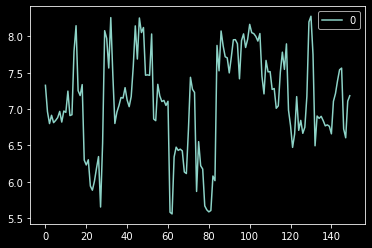

In [27]:


entDF = pd.DataFrame(avgClusteringList)
plt.style.use('dark_background')
entDF.plot()

In [8]:
#global graph measures

import math


density = nx.density(G)
avgClustering = nx.average_clustering(G)
trans = nx.transitivity(G)
ent = entropy(nx.eigenvector_centrality(G).values())


print(density,  avgClustering, trans, ent)


0.03817249788483552 0.4684632332295178 0.30933683519369665 7.1259937380010285


In [8]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [9]:
df  = pd.read_csv("2020-1-2-2021-7-1-498.csv")
tiingo498  = pd.read_csv("tiingoSP498.csv")
tiingo498

ticker
0        A
1      AAL
2      AAP
3     AAPL
4     ABBV
..     ...
493    YUM
494    ZBH
495   ZBRA
496   ZION
497    ZTS

[498 rows x 1 columns]

In [10]:
tiingoList = list(tiingo498['ticker'])
#test = list(range(1, 5))


In [11]:
nxList = list(range(len(tiingoList)))
nxList

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [12]:
config = {}
# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "a5e87637752491cca8c3a282688dbe81f7243561"

#quandl uUfmVoEksfwWxMA4tQcd
# Initialize
client = TiingoClient(config)

In [39]:
#months ago
n = 10

today = date.today().strftime("%Y/%m/%d")
start = date.today() - relativedelta(months=n)
start = start.strftime("%Y/%m/%d")
#start

In [40]:
start

'2020/09/18'

In [41]:
df = client.get_dataframe(tiingoList,
                                      frequency='daily',
                                      metric_name='adjClose',
                                      startDate=start,
                                      endDate=today)

In [42]:
df = np.log1p(df.pct_change()).iloc[1:]
df /= df.std(axis=0)
#df /= df.mad(axis=0)
df

A       AAL       AAP      AAPL      ABBV  \
2020-09-21 00:00:00+00:00 -0.953893 -2.341413 -2.175469  1.577149 -0.798352   
2020-09-22 00:00:00+00:00  0.375366  0.321193  0.679005  0.823213 -0.386778   
2020-09-23 00:00:00+00:00 -1.318155 -1.024768 -1.489198 -2.262190 -1.165251   
2020-09-24 00:00:00+00:00 -0.444559 -0.409495  0.107012  0.539345 -0.996938   
2020-09-25 00:00:00+00:00  1.048684  1.311129  1.100196  1.944292  0.260733   
...                             ...       ...       ...       ...       ...   
2021-07-12 00:00:00+00:00 -0.261651 -0.072676 -0.436804 -0.222388  0.628802   
2021-07-13 00:00:00+00:00 -0.121069 -1.217429 -0.848559  0.414853  0.166733   
2021-07-14 00:00:00+00:00 -0.323804  0.895569  0.342579  1.257216  0.444662   
2021-07-15 00:00:00+00:00  0.167135 -0.236245 -0.261797 -0.237681 -0.107642   
2021-07-16 00:00:00+00:00 -0.015179 -1.009762 -0.988320 -0.748373  0.191250   

                                ABC      ABMD       ABT       ACN      ADBE  \
2020-09-21 00:00:00+00:00 -0.646273  0.133500 -0.569583 -0.676667  0.962056   
2020-09-22 00:00:00+00:00 -0.361271  0.525061 -0.726841  0.895850  1.298315   
2020-09-23 00:00:00+00:00 -0.728958 -1.505941 -1.328644 -1.879203 -1.920757   
2020-09-24 00:00:00+00:00  0.339517  0.405186 -1.183887 -5.112222 -0.325222   
2020-09-25 00:00:00+00:00  1.377886  0.673456  1.649037  0.068586  1.433678   
...                             ...       ...       ...       ...       ...   
2021-07-12 00:00:00+00:00  0.224439 -0.364759 -0.519291 -0.235722 -0.400342   
2021-07-13 00:00:00+00:00 -0.718943 -0.421135 -0.089750  0.237963  0.447636   
2021-07-14 00:00:00+00:00 -0.351785 -0.970520 -0.580679  0.589173  0.352975   
2021-07-15 00:00:00+00:00 -0.217485 -0.304119 -0.290520  0.122465 -0.245554   
2021-07-16 00:00:00+00:00 -0.152698  1.112691  0.483498 -0.677344 -0.006476   

                           ...       XEL      XLNX       XOM      XRAY  \
2020-09-21 00:00:00+00:00  ... -0.314732 -0.479436 -0.875773 -1.660663   
2020-09-22 00:00:00+00:00  ...  0.278480  0.224030 -1.061041 -0.135861   
2020-09-23 00:00:00+00:00  ... -0.826122 -1.013460 -1.383248 -1.977541   
2020-09-24 00:00:00+00:00  ...  1.067500  0.641778 -0.086424  0.021833   
2020-09-25 00:00:00+00:00  ...  1.705169  0.492310  0.393653  0.781081   
...                        ...       ...       ...       ...       ...   
2021-07-12 00:00:00+00:00  ...  0.202795 -0.138005 -0.041584  0.216267   
2021-07-13 00:00:00+00:00  ... -0.310363 -0.304908 -0.201567 -0.531269   
2021-07-14 00:00:00+00:00  ...  0.607669 -0.335047 -0.951147  0.120252   
2021-07-15 00:00:00+00:00  ...  0.744397 -0.845631 -0.415283 -0.271004   
2021-07-16 00:00:00+00:00  ...  0.480792 -0.306196 -1.189341 -0.485705   

                                XYL       YUM       ZBH      ZBRA      ZION  \
2020-09-21 00:00:00+00:00 -1.733226 -2.477409 -2.162196 -1.543174 -1.733130   
2020-09-22 00:00:00+00:00  0.386222  1.127339  0.696583  0.743973 -1.342272   
2020-09-23 00:00:00+00:00 -1.240286 -0.737765 -0.814218 -0.564876 -0.428740   
2020-09-24 00:00:00+00:00 -0.192171  1.433370 -0.738147  0.228775 -0.035008   
2020-09-25 00:00:00+00:00  0.715818  0.008879  1.324050  1.403100  0.267452   
...                             ...       ...       ...       ...       ...   
2021-07-12 00:00:00+00:00  0.334402 -0.487261  0.170845  0.035451  0.188495   
2021-07-13 00:00:00+00:00 -0.493672 -0.538696 -1.040088 -1.405554 -0.747716   
2021-07-14 00:00:00+00:00  0.136540  0.020785 -0.565738 -0.343483 -0.032061   
2021-07-15 00:00:00+00:00 -0.570712 -0.090108 -0.973259 -0.750004  0.198275   
2021-07-16 00:00:00+00:00 -0.373519 -0.794496  0.118568 -0.432711 -1.347161   

                                ZTS  
2020-09-21 00:00:00+00:00  0.044511  
2020-09-22 00:00:00+00:00  0.239882  
2020-09-23 00:00:00+00:00 -0.973377  
2020-09-24 00:00:00+00:00 -0.609479  
2020-09-25 00:00:00+00:00  1.285104  
...                             ...  
2021-07-12 00:00:00+00:00  0.300

In [43]:
#input nxG - networkx graph
#output GT - Graph-tool graph

def nxToGT(nxG):
    edgelist = list(nxG.edges)
    GT = gt.Graph(directed=False)
    GT.add_edge_list(edgelist)
    return GT

In [44]:
def LassoCV(df,tiingoList):
    edge_model = GraphicalLassoCV(cv=10)
    #edge_model = GraphicalLasso
    #edge_model = GraphicalLasso().fit(df)

    edge_model.fit(df)
    #the precision(inverse covariance) matrix that we want
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=tiingoList , index=tiingoList )


    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links=links.loc[ (abs(links['value']) > 0.00) &  (links['var1'] != links['var2']) ] 

    G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
    return G

In [45]:


def Lasso(df,tiingoList):
    #edge_model = GraphicalLassoCV(cv=10)
    #edge_model = GraphicalLasso
    edge_model = GraphicalLasso().fit(df)

    
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=tiingoList , index=tiingoList )


    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links=links.loc[ (abs(links['value']) > 0.00) &  (links['var1'] != links['var2']) ] 

    G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
    return G

In [46]:
#returns a sorted list of the number input of the nodes with the highest 
#eigenvector centrality

def centrality(G, number=10):
    eigenvector = nx.eigenvector_centrality(G)
    return sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:number]
    

In [47]:
length = 60
window = 30

#tempDF = df[(-1-length * 2):-1]
tempDF = df[(-1-length * 2):-1]
len(tempDF[:length])

60

In [48]:
def splitDF(df, window):
    tempDFList = []
    #entropy = []
    tempDF = df[(-1-window * 2):-1]
    for i in range(window):
        tempDFList.append(tempDF[i:length+i])
    return tempDFList

In [49]:
def splitDFTwo(df,length, window):
    tempDFList = []
    tempDF = df[(-1-length):-1]
    for i in range(window):
        tempDFList.append(tempDF[i:window+i])
    return tempDFList

In [50]:
#returns a list of sub dataframes from input DF

def splitDF3(df,window, samples):
    if len(df) < (window + samples):
        return print("error, need bigger dataframe")
    tempDFList = []
    start = window + samples
    tempDF = df[(-1-start):-1]
    for i in range(samples):
        tempDFList.append(tempDF[i:window+i])
    return tempDFList

In [51]:
window = 10
samples = 150
templist30 = splitDF3(df,window, samples)
templist30[0]


A       AAL       AAP      AAPL      ABBV  \
2020-11-24 00:00:00+00:00  1.640860  2.694721  1.744312  0.608556  1.211144   
2020-11-25 00:00:00+00:00 -0.217167  0.244580 -0.173391  0.392742  0.161712   
2020-11-27 00:00:00+00:00 -0.171543  0.081090  0.213643  0.254177  0.462855   
2020-11-30 00:00:00+00:00  1.833611 -1.771618 -0.904062  1.102293 -0.207571   
2020-12-01 00:00:00+00:00 -0.999368  0.299008  1.972933  1.602847 -0.363050   
2020-12-02 00:00:00+00:00 -0.517852  1.228686 -1.667362  0.154638  0.637449   
2020-12-03 00:00:00+00:00 -0.654019  2.411811  0.682933 -0.060083 -0.167189   
2020-12-04 00:00:00+00:00  1.034561  0.578756  0.929059 -0.297127  1.680370   
2020-12-07 00:00:00+00:00 -0.492446  1.462078  0.476887  0.643808 -0.947703   
2020-12-08 00:00:00+00:00  1.700002  0.731244 -0.354350  0.268076  1.215209   

                                ABC      ABMD       ABT       ACN      ADBE  \
2020-11-24 00:00:00+00:00  1.586535 -0.128148 -1.019534  1.073154  0.253887   
2020-11-25 00:00:00+00:00  0.005978 -0.313479 -0.746855 -0.188024  0.887414   
2020-11-27 00:00:00+00:00  0.053775  1.353314  0.753044  0.221647  0.823062   
2020-11-30 00:00:00+00:00 -0.053775  0.361513  0.370276 -0.289122  0.169033   
2020-12-01 00:00:00+00:00 -0.552410 -0.974489  0.165955  0.888812  0.079645   
2020-12-02 00:00:00+00:00  0.558387 -0.497836 -0.209048 -0.728665  0.246415   
2020-12-03 00:00:00+00:00 -0.975968  0.268105 -0.382902  0.075732  0.350815   
2020-12-04 00:00:00+00:00  0.892232  0.959695  0.228771  0.977133  0.198825   
2020-12-07 00:00:00+00:00 -2.125041 -0.120289 -0.445901 -1.153967  0.716599   
2020-12-08 00:00:00+00:00  0.579608  0.289465 -0.236546  0.157208  0.344139   

                           ...       XEL      XLNX       XOM      XRAY  \
2020-11-24 00:00:00+00:00  ... -0.260537 -0.021985  2.733415  0.997133   
2020-11-25 00:00:00+00:00  ... -0.035593  0.637669 -1.198933 -0.208638   
2020-11-27 00:00:00+00:00  ... -0.583581  0.517711 -0.649342  0.308092   
2020-11-30 00:00:00+00:00  ... -0.311375  2.086268 -2.231788 -0.700674   
2020-12-01 00:00:00+00:00  ...  1.250181  0.062848  0.409604 -0.257422   
2020-12-02 00:00:00+00:00  ...  0.318374  0.327571  1.557514  2.468759   
2020-12-03 00:00:00+00:00  ... -1.628572 -0.683453  0.285772 -1.070197   
2020-12-04 00:00:00+00:00  ... -1.895290  0.882064  1.522970  1.409970   
2020-12-07 00:00:00+00:00  ...  1.050332  0.089025 -0.801292 -0.130389   
2020-12-08 00:00:00+00:00  ... -0.694623 -0.517380  1.367384  0.588202   

                                XYL       YUM       ZBH      ZBRA      ZION  \
2020-11-24 00:00:00+00:00  2.018132  2.029830  1.972129  1.537608  1.862009   
2020-11-25 00:00:00+00:00 -0.587864 -0.440213 -0.563880 -0.104122 -0.724178   
2020-11-27 00:00:00+00:00  0.319345  0.432643  0.137426  0.597992 -1.221224   
2020-11-30 00:00:00+00:00 -0.833401 -1.051448 -0.364456  0.197364 -0.734571   
2020-12-01 00:00:00+00:00  0.783823  0.413060 -1.239230 -0.874289  1.240019   
2020-12-02 00:00:00+00:00 -0.662101 -1.044349  0.721183 -0.704350  1.234665   
2020-12-03 00:00:00+00:00  0.435000 -0.356300 -0.634186  0.732554  0.643153   
2020-12-04 00:00:00+00:00  1.170026  1.033588  1.123795  0.853021  1.216157   
2020-12-07 00:00:00+00:00 -0.146920 -0.476591 -1.430912 -0.647590 -0.837742   
2020-12-08 00:00:00+00:00  0.300501 -0.069416  0.414655  0.281511  0.038371   

                                ZTS  
2020-11-24 00:00:00+00:00 -1.444034  
2020-11-25 00:00:00+00:00 -0.387957  
2020-11-27 00:00:00+00:00  0.570061  
2020-11-30 00:00:00+00:00 -0.485156  
2020-12-01 00:00:00+00:00  0.436344  
2020-12-02 00:00:00+00:00 -1.077857  
2020-12-03 00:00:00+00:00 -0.852226  
2020-12-04 00:00:00+00:00  0.400177  
2020-12-07 00:00:00+00:00  0.226381  
2020-12-08 00:00:00+00:00  0.243691  

[10 rows x 498 columns]

In [27]:
#ten = LassoCV(templist30[9],tiingoList)
#ten2 = LassoCV(templist30[8],tiingoList)
#ten3 = LassoCV(templist30[3],tiingoList)

In [56]:

listG = []

for i in range(samples):
    G = LassoCV(templist30[i],tiingoList)
    listG.append(G)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning

1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

4


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

5


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

6


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

7


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

8


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

9


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

10


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

11


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

12


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

13


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

14


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

15


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

16


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
 

17


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may wan

18


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

19


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

20


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning

21


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

22


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

23


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

24


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWa

25


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

26


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

27


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

28


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

29


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

30


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

31


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

32


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

33


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

34


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

35


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

36


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

37


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWa

38


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

39


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

40


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

41


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

42


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

43


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

44


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

45


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

46


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

47


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

48


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may

49


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

50


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

51


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
 

52


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

53


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

54


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

55


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

56


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

57


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

58


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

59


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

60


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

61


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

62


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

63


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, ind

64


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

65


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

66


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

67


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

68


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

69


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

70


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

71


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

72


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

73


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

74


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

75


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

76


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

77


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

78


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

79


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

80


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

81


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

82


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

83


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

84


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

85


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

86


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

87


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

88


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

89


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

90


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWa

91


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

92


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWa

93


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

94


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value

95


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encounter

96


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWa

97


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overfl

98


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

99


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

100


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

101


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

102


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

103


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

104


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

105


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

106


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

107


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

108


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

109


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

110


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

111


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

112


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

113


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

114


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/c

115


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may

116


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

117


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

118


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

119


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

120


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

121


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

122


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

123


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

124


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

125


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

126


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

127


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

128


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

129


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWa

130


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

131


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

132


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWa

133


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

134


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

135


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

136


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

137


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

138


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

139


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

140


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample availabl

141


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encounter

142


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encounter

143


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

144


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

145


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may wan

146


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid v

147


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

148


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: U

149


In [57]:
#listG[0].nodes.values

filename = '2020-11-24TO2021-07-14-Sample150-Step1-Window10.dictG'
outfile = open(filename,'wb')

In [58]:
pickle.dump(listG,outfile)
outfile.close()

In [29]:
G1 = listG[1]
G1.nodes

NodeView(('A', 'IDXX', 'AAL', 'ALK', 'FRT', 'HPE', 'LUV', 'NWL', 'PM', 'UAL', 'AAP', 'AZO', 'CINF', 'ORLY', 'STT', 'T', 'WHR', 'ABMD', 'CTLT', 'ACN', 'PAYC', 'ADM', 'AME', 'AMP', 'BK', 'CMI', 'DOW', 'ETN', 'FAST', 'FBHS', 'FCX', 'FTV', 'ITW', 'JPM', 'L', 'NUE', 'PKG', 'RHI', 'AFL', 'AIG', 'CB', 'CSX', 'DHI', 'DOV', 'HIG', 'KSU', 'MAS', 'MET', 'NSC', 'PFG', 'PHM', 'PRU', 'TEL', 'UNP', 'WRB', 'ALL', 'DFS', 'FRC', 'GL', 'IVZ', 'MTB', 'NWS', 'PCAR', 'RF', 'SCHW', 'SIVB', 'TRV', 'UNM', 'AIZ', 'AJG', 'CPRT', 'EXR', 'GWW', 'TROW', 'AKAM', 'COST', 'CSCO', 'CTXS', 'HPQ', 'VRSN', 'ALB', 'ANTM', 'BAC', 'CNC', 'COF', 'DE', 'DIS', 'GS', 'LNC', 'MS', 'NDAQ', 'NWSA', 'PWR', 'BEN', 'LEN', 'LOW', 'ALLE', 'HD', 'AMCR', 'JBHT', 'AMD', 'XLNX', 'APD', 'APH', 'AVY', 'EMN', 'EMR', 'EXPD', 'IEX', 'IR', 'JCI', 'LIN', 'LKQ', 'PNR', 'PPG', 'SWK', 'TT', 'TXT', 'AMGN', 'BBY', 'COP', 'FANG', 'HAL', 'BLK', 'CAT', 'GRMN', 'HBAN', 'IPGP', 'KEY', 'LUMN', 'NTRS', 'PBCT', 'RJF', 'SHW', 'SYF', 'URI', 'USB', 'AMT', 'CCI', 

In [30]:
filename = '2021-04-21TO.dictG'
outfile = open(filename,'wb')

In [31]:
pickle.dump(listG,outfile)
outfile.close()

In [91]:
centralityList = []
for i in range(len(listG)):
    temp = nx.eigenvector_centrality(listG[i])
    gl = temp['GL']
    centralityList.append(gl)
centralityList[0]

0.39768438920345267

<AxesSubplot:>

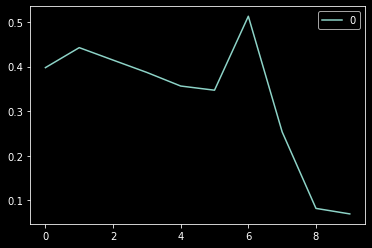

In [92]:
import matplotlib.pyplot as plt
entDF = pd.DataFrame(centralityList)
plt.style.use('dark_background')
entDF.plot()

In [32]:
#centrality(ten3)
eigenvector = nx.eigenvector_centrality(ten3)
eigenvector.items(),

(dict_items([('A', 0.005431702912363499), ('APTV', 0.10521280488477563), ('AAL', 0.026036836367400368), ('DAL', 0.10108244853928447), ('EBAY', 0.009635781087229319), ('HBAN', 0.06237799905408821), ('LYV', 0.0781809248517418), ('MO', 0.03372382556861183), ('NCLH', 0.05021291814094153), ('RCL', 0.024246053707195736), ('UAL', 0.0455979542183593), ('WDC', 0.09927589360091012), ('AAPL', 0.01324302497414701), ('IPGP', 0.043912448722775936), ('STX', 0.11332597305176884), ('ABC', 0.0016669602600723398), ('MCK', 0.013373504360999907), ('TMUS', 0.005974029046116001), ('VRSK', 0.012942866426009055), ('ABMD', 0.012867983104155661), ('CTXS', 0.0026942545704051932), ('EW', 0.036037959582400275), ('HSY', 0.03959259175124939), ('ISRG', 0.08302522710526694), ('KMB', 0.025126318940305956), ('NOC', 0.039205988708307514), ('NOW', 0.008698198426880794), ('PTC', 0.0023945021367265556), ('TFX', 0.012486753477233542), ('ACN', 0.03377244444869943), ('DOV', 0.08349070990256445), ('EXC', 0.05498963858004353), ('

In [23]:
centrality(ten2)

[('COG', 0.2854905509835384),
 ('HAL', 0.2389425806137137),
 ('PSX', 0.22063115696053182),
 ('AMZN', 0.21881030860332723),
 ('LNC', 0.21779860770845824),
 ('UNM', 0.21066017274607463),
 ('NKE', 0.20890485015648763),
 ('FANG', 0.2088471886753693),
 ('OXY', 0.18087552724810568),
 ('PRU', 0.1643283715555563)]

In [38]:
centrality(ten3)

[('HPQ', 0.20115580371486183),
 ('MAS', 0.20006246554269355),
 ('TEL', 0.19797972109897546),
 ('DHI', 0.18962408165177366),
 ('HD', 0.16690404008690357),
 ('XYL', 0.16389984251548573),
 ('JNPR', 0.15617860361148708),
 ('LOW', 0.1474533845692629),
 ('MHK', 0.14011880397949114),
 ('SIVB', 0.1348001836806055)]

In [88]:
G = listG[5]
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('GL', 0.3470678896244403),
 ('UNM', 0.2727930950855838),
 ('NTRS', 0.2726447201567558),
 ('LNC', 0.2631252953891755),
 ('EMR', 0.23730136286755094),
 ('TFC', 0.22113765848261968),
 ('MET', 0.20855804514065976),
 ('ZION', 0.18747976358455595),
 ('PRU', 0.18396081583886306),
 ('RF', 0.18274343121860617)]

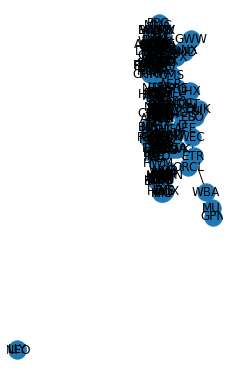

In [83]:
G = listG[9]

pos = nx.spring_layout(G, k=0.1*1/np.sqrt(len(G.nodes())), iterations=20)

plt.figure(3, figsize=(3, 5))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

In [22]:
#entropy = []
listG = []
listState = []
for i in range(5):
    G = LassoCV(templist30[i],tiingoList)
    print(i)
    #tempGT = nxToGT(G)
    #tempState = gt.minimize_nested_blockmodel_dl(G, deg_corr=True)
    #tempEntropy = tempState.entropy()
    #listState.append(tempState)
    listG.append(G)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply


0
0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


1
1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

2
2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

3
3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

4
4


In [23]:
eigenvector = nx.eigenvector_centrality(listG[0])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('MAS', 0.3097110697831162),
 ('DHI', 0.20998069009902698),
 ('XYL', 0.20686868071655032),
 ('HD', 0.2064808004308862),
 ('TEL', 0.1946459193090473),
 ('MHK', 0.18181635501953144),
 ('SWK', 0.17298906799791183),
 ('FBHS', 0.17085219444517835),
 ('ITW', 0.1608334748088432),
 ('AOS', 0.14340018282330977)]

In [40]:
eigenvector = nx.eigenvector_centrality(listG[1])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:450]

[('MAS', 0.2656581206746778),
 ('XYL', 0.2511221779949275),
 ('HD', 0.2145606605864039),
 ('SWK', 0.19589371065699238),
 ('DHI', 0.18396019602604188),
 ('MHK', 0.17634572252095201),
 ('ITW', 0.15487978737170233),
 ('FBHS', 0.15463912583431902),
 ('AOS', 0.14244714161142205),
 ('LOW', 0.1378577817883159),
 ('CTAS', 0.13624348694762375),
 ('PHM', 0.1242111481469071),
 ('TEL', 0.1132700594893377),
 ('AME', 0.1070656709908668),
 ('FTV', 0.10629794941036114),
 ('TJX', 0.10563012678882291),
 ('BEN', 0.10124036045559916),
 ('PNR', 0.10103828775492606),
 ('DOV', 0.09813305746985403),
 ('PNC', 0.09788147998827185),
 ('AFL', 0.09665046424425945),
 ('GWW', 0.0965483549209545),
 ('PKG', 0.0958453069823592),
 ('ALLE', 0.09570277227350134),
 ('GPS', 0.09432249241647657),
 ('LYB', 0.09421172144682752),
 ('GRMN', 0.09375780029068193),
 ('GD', 0.09373917200701258),
 ('PRU', 0.093245969302387),
 ('HPQ', 0.09220218918368478),
 ('HON', 0.09197918167248975),
 ('JCI', 0.09130418335114865),
 ('MCO', 0.088212

In [29]:
eigenvector = nx.eigenvector_centrality(listG[2])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:30]

[('MAS', 0.2657166058075811),
 ('XYL', 0.22941246101402415),
 ('HD', 0.21204567448265518),
 ('DHI', 0.19327686031119642),
 ('SWK', 0.19177122499124818),
 ('MHK', 0.17281124442454163),
 ('FBHS', 0.16740486839635504),
 ('LOW', 0.14699727041854005),
 ('ITW', 0.14178797186666772),
 ('AOS', 0.128555923387321),
 ('PHM', 0.12822360945944838),
 ('TEL', 0.12042208451715851),
 ('CTAS', 0.10982210834826045),
 ('TJX', 0.10841562710100103),
 ('PNR', 0.1064582012478197),
 ('INFO', 0.1062790859185134),
 ('BEN', 0.10462261800190291),
 ('AME', 0.10360005408704494),
 ('GRMN', 0.10309833092444674),
 ('JCI', 0.10178582679721972),
 ('ALLE', 0.10050254277247841),
 ('MCO', 0.09804262524853971),
 ('LYB', 0.09659289482965194),
 ('HPQ', 0.09648629321692422),
 ('FTV', 0.09583581851143369),
 ('GS', 0.09498378727740893),
 ('PNC', 0.09441656659147235),
 ('GD', 0.09433006039402099),
 ('NVR', 0.0916528245680057),
 ('HON', 0.09032253686722397)]

In [30]:
eigenvector = nx.eigenvector_centrality(listG[3])
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:30]

[('MAS', 0.2584077857746244),
 ('XYL', 0.22213627112903497),
 ('HD', 0.21302206548693212),
 ('SWK', 0.19975019872127725),
 ('DHI', 0.18534103047175618),
 ('MHK', 0.16855727819962849),
 ('FBHS', 0.16708727855111816),
 ('LOW', 0.15696761897279346),
 ('AOS', 0.13986750428379607),
 ('TEL', 0.13646370081905593),
 ('ITW', 0.13188932231207176),
 ('MCO', 0.12422601633534056),
 ('PHM', 0.12263063166131583),
 ('TJX', 0.1106008454152389),
 ('GD', 0.11018977517178997),
 ('BEN', 0.1097233519133429),
 ('ALLE', 0.10660367587537634),
 ('INFO', 0.10498251613474044),
 ('LEG', 0.10404110651245667),
 ('AME', 0.10288748486116592),
 ('GRMN', 0.10137913184966758),
 ('GS', 0.10135820017283728),
 ('CTAS', 0.09988033135589633),
 ('JNPR', 0.09818099966946857),
 ('PNR', 0.09565315081467933),
 ('RSG', 0.09558082056914045),
 ('PNC', 0.0924967715678774),
 ('DOV', 0.0912833930381828),
 ('LYB', 0.09105885445952319),
 ('JCI', 0.09016067416461797)]

In [45]:
entropy = []
listGT = []
listState = []
for i in range(length):
    G = Lasso(templist[i],nxList)
    tempGT = nxToGT(G)
    tempState = gt.minimize_nested_blockmodel_dl(tempGT)
    tempEntropy = tempState.entropy()
    listState.append(tempState)
    entropy.append(tempEntropy)
    listGT.append(tempGT)
    print(i)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


0


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


1


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

2


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


3


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -4.254e-04
  warnings.warn('graphical_lasso: did not converge after '


4


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


5


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.107e-04
  warnings.warn('graphical_lasso: did not converge after '


6


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


7


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

8


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


9


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


10


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.809e-04
  warnings.warn('graphical_lasso: did not converge after '


11


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

12


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


13


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


14


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

15


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


16


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

17


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


18


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


19


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


20


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


21


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


22


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


23


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.710e-04
  warnings.warn('graphical_lasso: did not converge after '


24


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


25


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.597e-04
  warnings.warn('graphical_lasso: did not converge after '


26


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.269e-04
  warnings.warn('graphical_lasso: did not converge after '


27


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.253e-04
  warnings.warn('graphical_lasso: did not converge after '


28


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

29


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


30


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

31


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.749e-04
  warnings.warn('graphical_lasso: did not converge after '


32


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.612e-04
  warnings.warn('graphical_lasso: did not converge after '


33


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.739e-04
  warnings.warn('graphical_lasso: did not converge after '


34


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.215e-04
  warnings.warn('graphical_lasso: did not converge after '


35


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.559e-04
  warnings.warn('graphical_lasso: did not converge after '


36


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


37


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

38


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

39


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

40


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


41


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

42


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


43


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


44


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


45


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

46


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(

47


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


48


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


49


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


50


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.469e-04
  warnings.warn('graphical_lasso: did not converge after '


51


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = a

52


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.269e-04
  warnings.warn('graphical_lasso: did not converge after '


53


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


54


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: overflow encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: overflow encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


55


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


56


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


57


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


58


/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


59


In [46]:
entropy

[12948.349800707263,
 13049.991098039838,
 12988.150099039236,
 12824.31878401957,
 12488.789959647787,
 12591.072281854267,
 12139.26922706611,
 12320.86165064325,
 12204.665444979291,
 12117.316511564224,
 12091.45284466969,
 11670.27561735492,
 11680.000445612253,
 8313.001576596147,
 7207.466647368207,
 5706.187122928401,
 5272.18687578188,
 5104.732517356272,
 5312.531131374011,
 4841.370706928939,
 5201.5369004132035,
 5157.359693774429,
 5327.651244003075,
 5457.8833066037005,
 5599.873168521044,
 6396.120300343611,
 7862.400488395083,
 8702.22105369326,
 8901.979075703055,
 8720.841495000985,
 9857.247802320731,
 10052.188668792272,
 9230.713999034477,
 7521.199639071574,
 7088.981408018571,
 7170.028783041984,
 6807.1505165176295,
 6275.891611995395,
 12293.91840512516,
 11103.331280305378,
 11862.663704948944,
 11575.082313105278,
 11625.612224277853,
 11595.954720913409,
 11808.223014940224,
 11717.272072992724,
 11599.04989400782,
 11355.408548508394,
 11269.098214366895,
 

In [47]:
entDF = pd.DataFrame(entropy)

<AxesSubplot:>

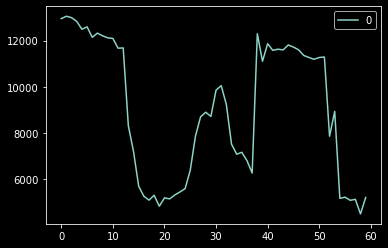

In [52]:
import matplotlib.pyplot as plt
entDF = pd.DataFrame(entropy)
plt.style.use('dark_background')
entDF.plot()

In [21]:
for i in range(5):
    temp = listState[i]
    gt.draw_hierarchy(temp, output="state"+str(i)+".png", vcmap=cm.magma)

In [ ]:

    #name = 'C:/Users/marialavrovskaa/Desktop/Images/file_' + str(image_no) + '.jpg'

In [36]:
#G = Lasso(df,tiingoList)
G = Lasso(df,nxList)

G.number_of_edges(MAS)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19599421976965203, tolerance: 0.005999010889414362
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09482612000631008, tolerance: 0.003240587729975149
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.39137312644357536, tolerance: 0.005322743139526873
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.008410786851680835
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.006555655629303165
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0014867074708815996
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0030275767949621718
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0041824014688476826
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.006312824993393895
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0029032212393287453
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.005912904189474091
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0055768684637632964
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.00365936656810833
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0023218325098660897
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.004812889739399043
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.004411501454954936
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0034310974779328796
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0034195385675475243
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.005217878926575462
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003627957716199057
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.004330099786809863
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.007634049346190674
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0004469029641106861
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003048302413650357
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.007454104712682373
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0035446899815357747
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003922121723293587
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.005945467041069274
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0037586703166074624
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0034997095885826363
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003996357256846459
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.008373267332420357
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.005934191266437303
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0047377256674866605
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.008299977535472467
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.003317605274138874
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.002200711321967624
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0029303723386343997
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0009581144551013637
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0023013128266097054
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.0015934307313122797
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:229: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.006927091718645647
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance

FloatingPointError: Non SPD result: the system is too ill-conditioned for this solver. The system is too ill-conditioned for this solver

In [31]:
#G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
G=listG[3]
pos = nx.spring_layout(G, k=0.1*1/np.sqrt(len(G.nodes())), iterations=20)

EdgeDataView([('MAS', 'ACN'), ('MAS', 'AFL'), ('MAS', 'ALLE'), ('MAS', 'AME'), ('MAS', 'AMP'), ('MAS', 'AOS'), ('MAS', 'AVY'), ('MAS', 'BBY'), ('MAS', 'CB'), ('MAS', 'CDW'), ('MAS', 'CMI'), ('MAS', 'CSCO'), ('MAS', 'DHI'), ('MAS', 'DVA'), ('MAS', 'ETN'), ('MAS', 'EXPD'), ('MAS', 'FAST'), ('MAS', 'FBHS'), ('MAS', 'FDX'), ('MAS', 'GD'), ('MAS', 'GLW'), ('MAS', 'GPC'), ('MAS', 'GPS'), ('MAS', 'GWW'), ('MAS', 'HBI'), ('MAS', 'HCA'), ('MAS', 'HD'), ('MAS', 'HON'), ('MAS', 'HPE'), ('MAS', 'HPQ'), ('MAS', 'HSIC'), ('MAS', 'INFO'), ('MAS', 'ITW'), ('MAS', 'IVZ'), ('MAS', 'J'), ('MAS', 'JBHT'), ('MAS', 'JCI'), ('MAS', 'KIM'), ('MAS', 'L'), ('MAS', 'LEN'), ('MAS', 'LHX'), ('MAS', 'LKQ'), ('MAS', 'LMT'), ('MAS', 'MCO'), ('MAS', 'MET'), ('MAS', 'MMM'), ('MAS', 'NLSN'), ('MAS', 'NOC'), ('MAS', 'NVR'), ('MAS', 'NWL'), ('MAS', 'ODFL'), ('MAS', 'PCAR'), ('MAS', 'PFG'), ('MAS', 'PHM'), ('MAS', 'PKG'), ('MAS', 'PNR'), ('MAS', 'POOL'), ('MAS', 'PPG'), ('MAS', 'PRU'), ('MAS', 'PWR'), ('MAS', 'ROL'), ('MAS

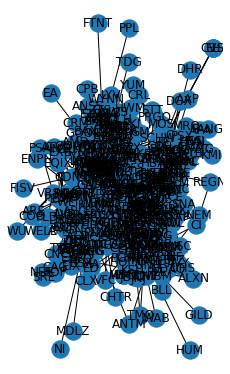

In [32]:

plt.figure(3, figsize=(3, 5))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

In [14]:
G.number_of_edges()

3176

In [16]:
nxt = nxToGT(G)

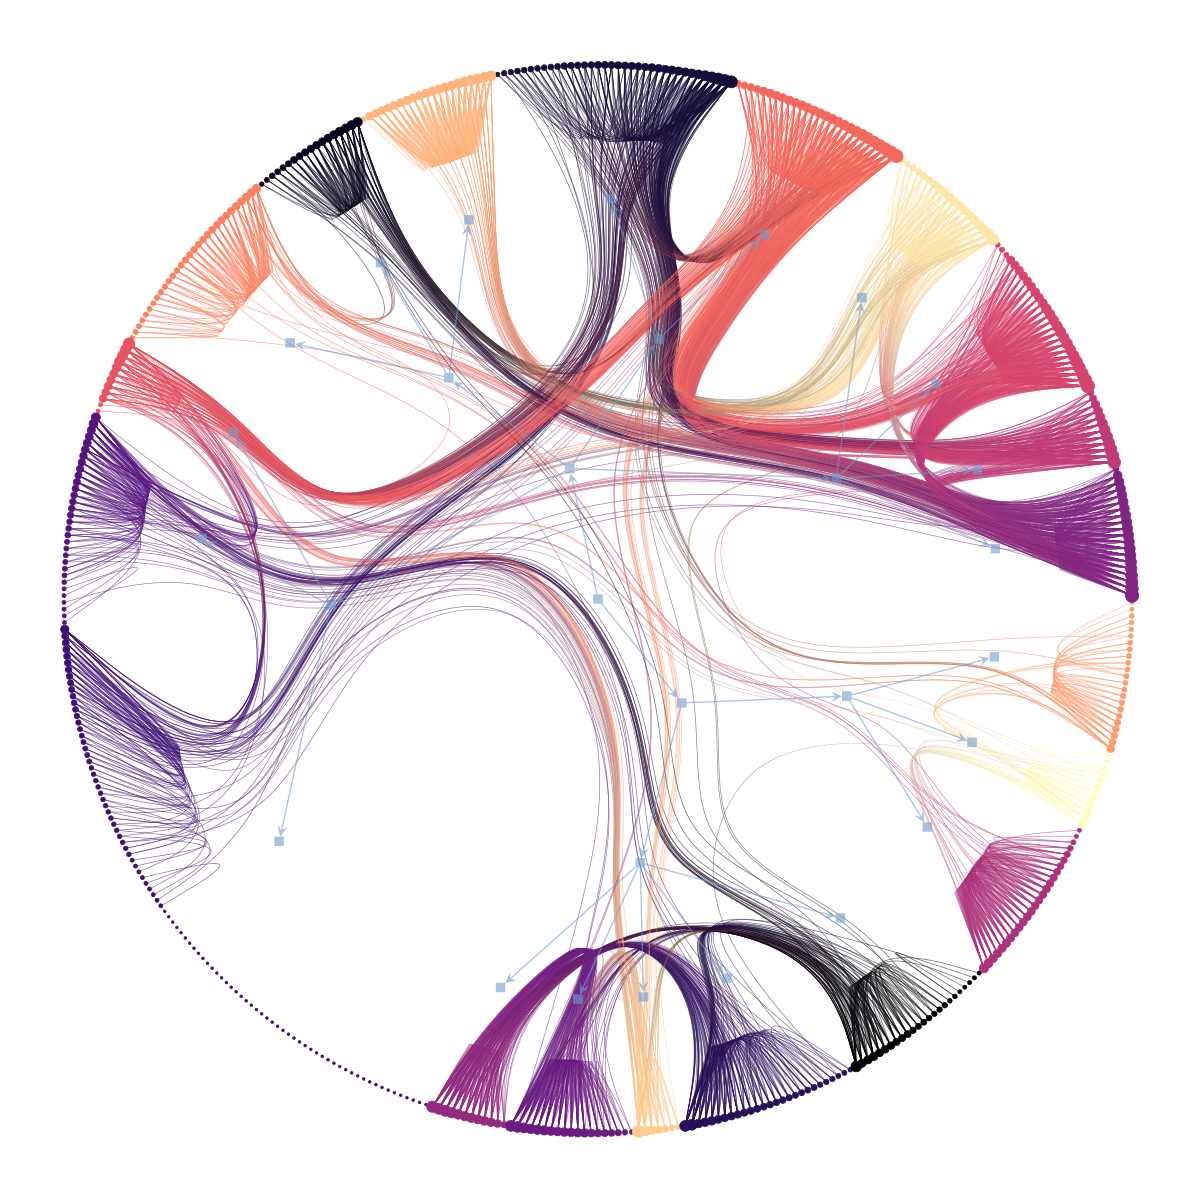

In [17]:
state = gt.minimize_nested_blockmodel_dl(nxt)
#state = gt.minimize_nested_blockmodel_dl(gtGraph, deg_corr=True, overlap=True)
gt.draw_hierarchy(state, output="1.png", vcmap=cm.magma)
Image("1.png")

In [18]:
state.entropy()

10047.50531708276

In [28]:
#input precision matrix
#output networkX G

def makeLinks(p):
    links = p.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links=links.loc[ (abs(links['value']) > 0.00) &  (links['var1'] != links['var2']) ] 
    G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
    return G

In [49]:
##Temporal Graphical Lasso

def graphLasso(df, inputlist):
    edge_model = GraphicalLassoCV(cv=10)
    #edge_model = GraphicalLasso
    #edge_model = GraphicalLasso().fit(first_n_column)

    edge_model.fit(df)
    #the precision(inverse covariance) matrix that we want
    p = edge_model.precision_
    p = pd.DataFrame(p, columns=inputlist , index=inputlist )
    return p

In [50]:
lassovar = graphLasso(df, nxList)

/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:243: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:245: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = (- precision_[idx, idx]
/home/lariat/anaconda3/envs/gt/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [51]:
type(lassovar)

pandas.core.frame.DataFrame

In [52]:
G = makeLinks(lassovar)

In [53]:
nxG = nxToGT(G)
nxG.edges

<bound method Graph.edges of <Graph object, undirected, with 496 vertices and 26 edges, at 0x7ff3b709c910>>

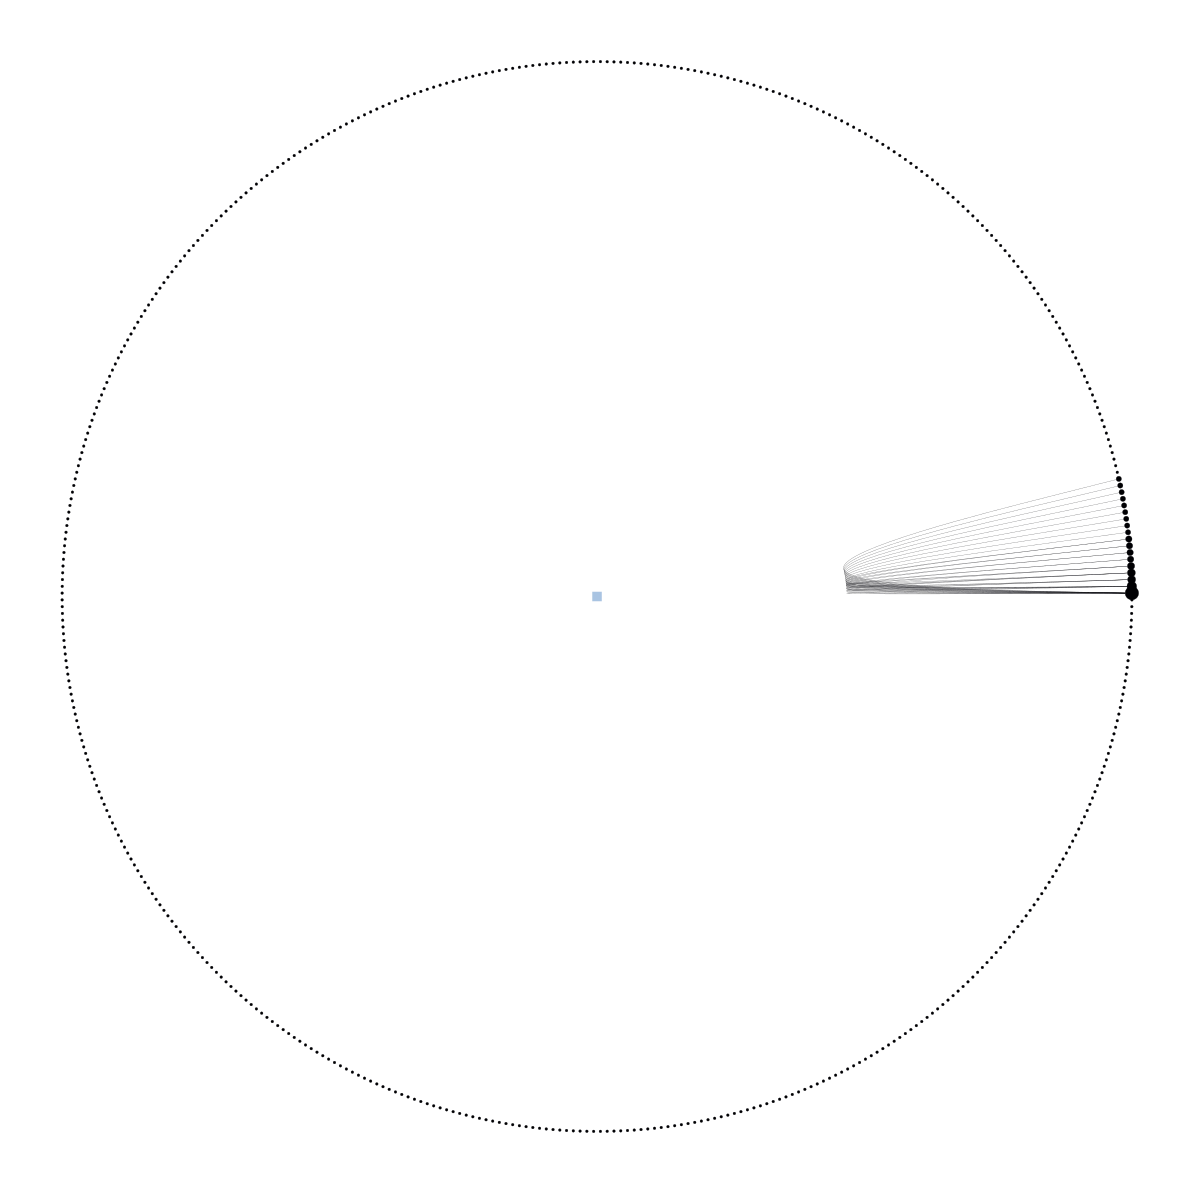

In [54]:
state = gt.minimize_nested_blockmodel_dl(nxG)
#state = gt.minimize_nested_blockmodel_dl(gtGraph, deg_corr=True, overlap=True)
gt.draw_hierarchy(state, output="1.png", vcmap=cm.magma)
Image("1.png")